## What Libaries are you working with?

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings 
warnings.filterwarnings("ignore")

## What Data set are you using?


In [49]:
amazon  = pd.read_csv(r"C:\Users\USER\OneDrive\Desktop\Amazon Sale Report.csv", low_memory=False)
amazon

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128970,128970,406-6001380-7673107,05-31-22,Shipped,Amazon,Amazon.in,Expedited,JNE3697,JNE3697-KR-XL,kurta,...,INR,517.00,HYDERABAD,TELANGANA,500013.0,IN,NaN,False,NaN,False
128971,128971,402-9551604-7544318,05-31-22,Shipped,Amazon,Amazon.in,Expedited,SET401,SET401-KR-NP-M,Set,...,INR,999.00,GURUGRAM,HARYANA,122004.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,False
128972,128972,407-9547469-3152358,05-31-22,Shipped,Amazon,Amazon.in,Expedited,J0157,J0157-DR-XXL,Western Dress,...,INR,690.00,HYDERABAD,TELANGANA,500049.0,IN,NaN,False,NaN,False
128973,128973,402-6184140-0545956,05-31-22,Shipped,Amazon,Amazon.in,Expedited,J0012,J0012-SKD-XS,Set,...,INR,1199.00,Halol,Gujarat,389350.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,False


## Understand and Read meaning into the data

In [50]:
amazon.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel ',
       'ship-service-level', 'Style', 'SKU', 'Category', 'Size', 'ASIN',
       'Courier Status', 'Qty', 'currency', 'Amount', 'ship-city',
       'ship-state', 'ship-postal-code', 'ship-country', 'promotion-ids',
       'B2B', 'fulfilled-by', 'Unnamed: 22'],
      dtype='object')

In [51]:
amazon.dtypes

index                   int64
Order ID               object
Date                   object
Status                 object
Fulfilment             object
Sales Channel          object
ship-service-level     object
Style                  object
SKU                    object
Category               object
Size                   object
ASIN                   object
Courier Status         object
Qty                     int64
currency               object
Amount                float64
ship-city              object
ship-state             object
ship-postal-code      float64
ship-country           object
promotion-ids          object
B2B                      bool
fulfilled-by           object
Unnamed: 22            object
dtype: object

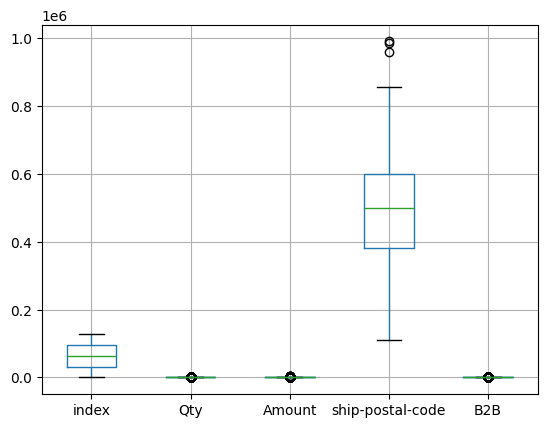

In [52]:
amazon.boxplot();
plt.show()

In [53]:
df_cleaned  = amazon.drop(columns=['index', 'Unnamed: 22'])
df_cleaned.columns


Index(['Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel ',
       'ship-service-level', 'Style', 'SKU', 'Category', 'Size', 'ASIN',
       'Courier Status', 'Qty', 'currency', 'Amount', 'ship-city',
       'ship-state', 'ship-postal-code', 'ship-country', 'promotion-ids',
       'B2B', 'fulfilled-by'],
      dtype='object')

In [54]:
df_cleaned.isna().sum()

Order ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Style                     0
SKU                       0
Category                  0
Size                      0
ASIN                      0
Courier Status         6872
Qty                       0
currency               7795
Amount                 7795
ship-city                33
ship-state               33
ship-postal-code         33
ship-country             33
promotion-ids         49153
B2B                       0
fulfilled-by          89698
dtype: int64

### Clean The Data

In [55]:
amazon['Courier Status'].unique()

array([nan, 'Shipped', 'Cancelled', 'Unshipped'], dtype=object)

In [56]:
df_cleaned['Courier Status'] = df_cleaned['Courier Status'].replace(np.nan, 'Unknown')

In [57]:
amazon['currency'].unique()

array(['INR', nan], dtype=object)

In [58]:
df_cleaned.drop(columns=['currency'], inplace=True)

In [59]:
df_cleaned['promotion-ids'] = df_cleaned['promotion-ids'].replace(np.nan, 'No Promotion')

In [60]:
df_cleaned['Amount'] = df_cleaned['Amount'].fillna(df_cleaned['Amount'].median())

In [61]:
df_cleaned.drop(columns=['fulfilled-by'], inplace=True)

In [62]:
df_cleaned.isna().sum()

Order ID               0
Date                   0
Status                 0
Fulfilment             0
Sales Channel          0
ship-service-level     0
Style                  0
SKU                    0
Category               0
Size                   0
ASIN                   0
Courier Status         0
Qty                    0
Amount                 0
ship-city             33
ship-state            33
ship-postal-code      33
ship-country          33
promotion-ids          0
B2B                    0
dtype: int64

In [63]:
df_cleaned.dropna()

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,ASIN,Courier Status,Qty,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B
0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,S,B09KXVBD7Z,Unknown,0,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,No Promotion,False
1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,B09K3WFS32,Shipped,1,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False
2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,B07WV4JV4D,Shipped,1,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True
3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,L,B099NRCT7B,Unknown,0,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,No Promotion,False
4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,3XL,B098714BZP,Shipped,1,574.00,CHENNAI,TAMIL NADU,600073.0,IN,No Promotion,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128970,406-6001380-7673107,05-31-22,Shipped,Amazon,Amazon.in,Expedited,JNE3697,JNE3697-KR-XL,kurta,XL,B098112V2V,Shipped,1,517.00,HYDERABAD,TELANGANA,500013.0,IN,No Promotion,False
128971,402-9551604-7544318,05-31-22,Shipped,Amazon,Amazon.in,Expedited,SET401,SET401-KR-NP-M,Set,M,B09VC6KHX8,Shipped,1,999.00,GURUGRAM,HARYANA,122004.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False
128972,407-9547469-3152358,05-31-22,Shipped,Amazon,Amazon.in,Expedited,J0157,J0157-DR-XXL,Western Dress,XXL,B0982YZ51B,Shipped,1,690.00,HYDERABAD,TELANGANA,500049.0,IN,No Promotion,False
128973,402-6184140-0545956,05-31-22,Shipped,Amazon,Amazon.in,Expedited,J0012,J0012-SKD-XS,Set,XS,B0894Y2NJQ,Shipped,1,1199.00,Halol,Gujarat,389350.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False


### Data Manipulation



In [64]:
df_cleaned.dtypes

Order ID               object
Date                   object
Status                 object
Fulfilment             object
Sales Channel          object
ship-service-level     object
Style                  object
SKU                    object
Category               object
Size                   object
ASIN                   object
Courier Status         object
Qty                     int64
Amount                float64
ship-city              object
ship-state             object
ship-postal-code      float64
ship-country           object
promotion-ids          object
B2B                      bool
dtype: object

In [161]:
#Date to date time 
df_cleaned['Date'] = pd.to_datetime(df_cleaned['Date'])

In [67]:
df_cleaned['Year'] = df_cleaned['Date'].dt.year
df_cleaned['Month'] = df_cleaned['Date'].dt.strftime('%B')  
df_cleaned['Week'] = df_cleaned['Date'].dt.strftime('Week %U')
df_cleaned['Day'] = df_cleaned['Date'].dt.strftime('%A')

In [68]:
df_cleaned.head(5)

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,...,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,Year,Month,Week,Day
0,405-8078784-5731545,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,S,...,MUMBAI,MAHARASHTRA,400081.0,IN,No Promotion,False,2022,April,Week 17,Saturday
1,171-9198151-1101146,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,...,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,2022,April,Week 17,Saturday
2,404-0687676-7273146,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,...,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,2022,April,Week 17,Saturday
3,403-9615377-8133951,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,L,...,PUDUCHERRY,PUDUCHERRY,605008.0,IN,No Promotion,False,2022,April,Week 17,Saturday
4,407-1069790-7240320,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,3XL,...,CHENNAI,TAMIL NADU,600073.0,IN,No Promotion,False,2022,April,Week 17,Saturday


## EDA 

## Total Sales by Category of Product

In [69]:
# Create a new column called Orders
df_cleaned['Order'] = df_cleaned['Amount']*df_cleaned['Qty']

In [157]:
df_cleaned.head(20)

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,...,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,Year,Month,Week,Day,Order
0,405-8078784-5731545,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,S,...,MAHARASHTRA,400081.0,IN,No Promotion,False,2022,April,Week 17,Saturday,0.0
1,171-9198151-1101146,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,...,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,2022,April,Week 17,Saturday,406.0
2,404-0687676-7273146,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,...,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,2022,April,Week 17,Saturday,329.0
3,403-9615377-8133951,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,L,...,PUDUCHERRY,605008.0,IN,No Promotion,False,2022,April,Week 17,Saturday,0.0
4,407-1069790-7240320,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,3XL,...,TAMIL NADU,600073.0,IN,No Promotion,False,2022,April,Week 17,Saturday,574.0
5,404-1490984-4578765,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,SET264,SET264-KR-NP-XL,Set,XL,...,UTTAR PRADESH,201102.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,2022,April,Week 17,Saturday,824.0
6,408-5748499-6859555,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,J0095,J0095-SET-L,Set,L,...,CHANDIGARH,160036.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,2022,April,Week 17,Saturday,653.0
7,406-7807733-3785945,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3405,JNE3405-KR-S,kurta,S,...,TELANGANA,500032.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,2022,April,Week 17,Saturday,399.0
8,407-5443024-5233168,2022-04-30,Cancelled,Amazon,Amazon.in,Expedited,SET200,SET200-KR-NP-A-XXXL,Set,3XL,...,TELANGANA,500008.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,2022,April,Week 17,Saturday,0.0
9,402-4393761-0311520,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,JNE3461,JNE3461-KR-XXL,kurta,XXL,...,TAMIL NADU,600041.0,IN,No Promotion,False,2022,April,Week 17,Saturday,363.0


In [156]:

df_cleaned.to_csv('cleaned_amazon_sales_data.csv', index=False)
print('cleaned_amazon_sales_data.csv')

cleaned_amazon_sales_data.csv


In [70]:
order_category= df_cleaned.groupby(['Category'])['Order'].sum().reset_index()
order_category

,Category,Order
0,Blouse,452754.0
1,Bottom,143475.0
2,Dupatta,915.0
3,Ethnic Dress,762949.0
4,Saree,125767.0
5,Set,37973154.0
6,Top,5245351.0
7,Western Dress,10710352.0
8,kurta,20720724.0


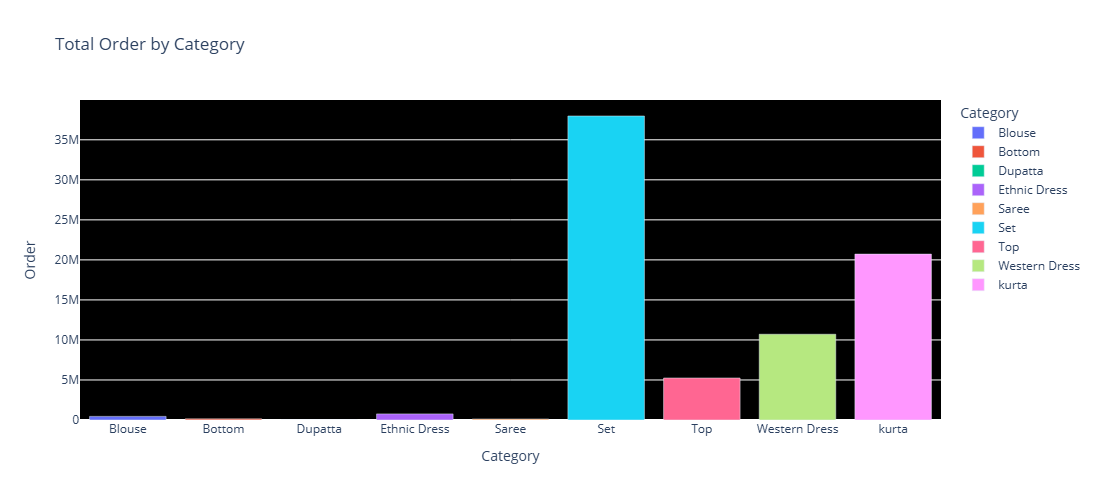

In [71]:
fig= px.bar(order_category, x='Category', y='Order',
            title='Total Order by Category',color='Category')
fig.update_layout(width =600, height =500, 
                  plot_bgcolor='black',paper_bgcolor='white')
fig.show()

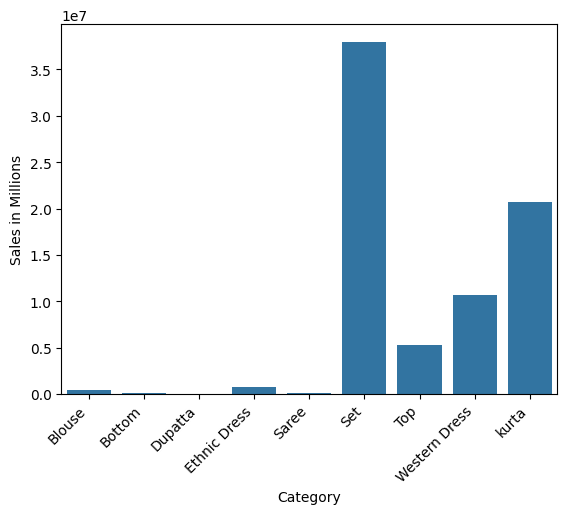

In [72]:
sns.barplot(data = order_category,
            x = 'Category', y = 'Order')
plt.xticks(rotation=45, ha="right")
plt.xlabel('Category')
plt.ylabel('Sales in Millions')
plt.show()

## What is the Effect of Promotion on Total Sales

In [73]:
df_cleaned['promotion-ids'].unique

<bound method Series.unique of 0                                              No Promotion
1         Amazon PLCC Free-Financing Universal Merchant ...
2              IN Core Free Shipping 2015/04/08 23-48-5-108
3                                              No Promotion
4                                              No Promotion
                                ...                        
128970                                         No Promotion
128971         IN Core Free Shipping 2015/04/08 23-48-5-108
128972                                         No Promotion
128973         IN Core Free Shipping 2015/04/08 23-48-5-108
128974         IN Core Free Shipping 2015/04/08 23-48-5-108
Name: promotion-ids, Length: 128975, dtype: object>

In [102]:
# Group by promotion status and calculate average order value
promotion_sales = df_cleaned.groupby('promotion-ids')['Order'].mean().reset_index()
promotion_sales

,promotion-ids,Order
0,Amazon PLCC Free-Financing Universal Merchant ...,0.000000
1,Amazon PLCC Free-Financing Universal Merchant ...,0.000000
2,Amazon PLCC Free-Financing Universal Merchant ...,0.000000
3,Amazon PLCC Free-Financing Universal Merchant ...,0.000000
4,Amazon PLCC Free-Financing Universal Merchant ...,0.000000
...,...,...
5783,VPC-44571-41445527 Coupon,682.518519
5784,VPC-44571-41445561 Coupon,657.774194
5785,VPC-44571-44201687 Coupon,662.519231
5786,VPC-44571-44201770 Coupon,666.204545


##  Top Performing States

In [75]:
order_state= df_cleaned.groupby(['ship-state'])['Order'].sum().nlargest(10).reset_index()
order_state

,ship-state,Order
0,MAHARASHTRA,12937351.0
1,KARNATAKA,10222900.0
2,TELANGANA,6705327.0
3,UTTAR PRADESH,6555661.0
4,TAMIL NADU,6327065.0
5,DELHI,4092973.0
6,KERALA,3641375.0
7,WEST BENGAL,3378962.0
8,ANDHRA PRADESH,3109687.0
9,HARYANA,2829354.0


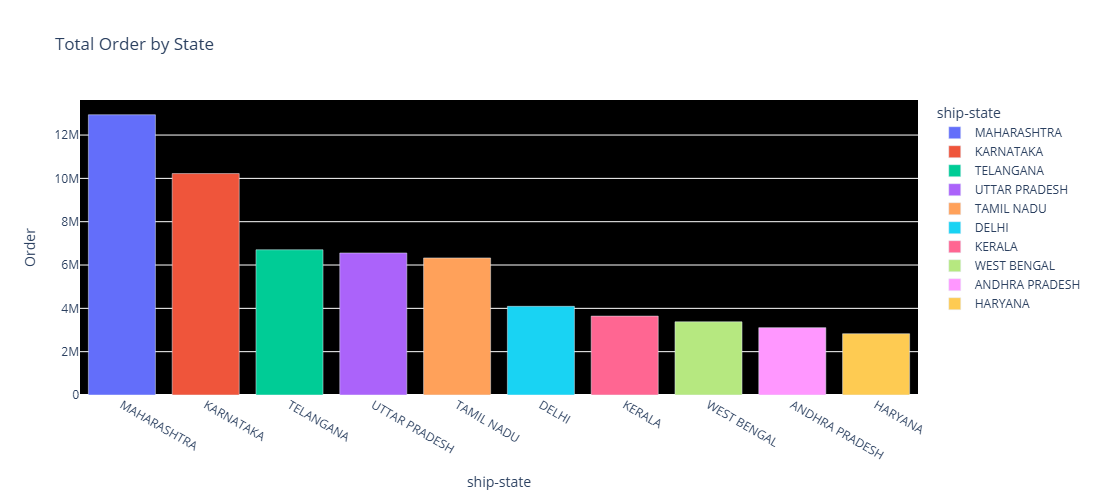

In [76]:
fig= px.bar(order_state, x='ship-state', y='Order',title='Total Order by State',color='ship-state')
fig.update_layout(width =600, height =500,  plot_bgcolor='black',paper_bgcolor='white')
fig.show()

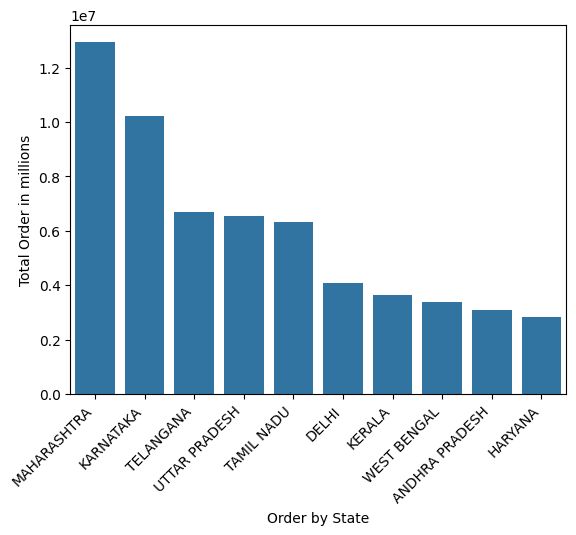

In [78]:
sns.barplot(order_state, x = 'ship-state', y = 'Order')
plt.xlabel('Order by State')
plt.ylabel('Total Order in millions')
plt.xticks(rotation=45, ha="right")
plt.show()

###  Cancellation Rates by Shipping Level

In [83]:
# Filter Cancelled orders
cancelled_orders = df_cleaned[df_cleaned['Status'] == 'Cancelled']
cancelled_orders.head(4)

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,...,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,Year,Month,Week,Day,Order
0,405-8078784-5731545,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,S,...,MAHARASHTRA,400081.0,IN,No Promotion,False,2022,April,Week 17,Saturday,0.0
3,403-9615377-8133951,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,L,...,PUDUCHERRY,605008.0,IN,No Promotion,False,2022,April,Week 17,Saturday,0.0
8,407-5443024-5233168,2022-04-30,Cancelled,Amazon,Amazon.in,Expedited,SET200,SET200-KR-NP-A-XXXL,Set,3XL,...,TELANGANA,500008.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,2022,April,Week 17,Saturday,0.0
23,404-6019946-2909948,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,SET291,SET291-KR-PP-M,Set,M,...,MAHARASHTRA,411044.0,IN,No Promotion,False,2022,April,Week 17,Saturday,0.0


In [92]:
# Group by shipping service level
cancel_rate = cancelled_orders['ship-service-level'].value_counts(normalize=True) * 100
cancel_rate

ship-service-level
Expedited    62.311804
Standard     37.688196
Name: proportion, dtype: float64

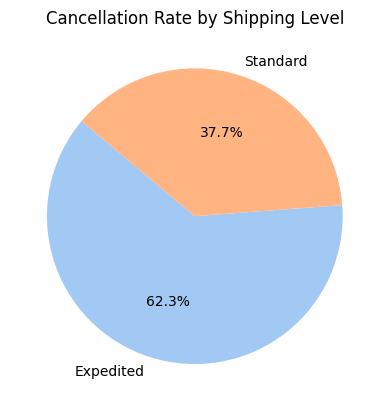

In [93]:
plt.pie(cancel_rate.values,  labels=cancel_rate.index,
    autopct='%1.1f%%',  
    startangle=140,    
    colors=sns.color_palette('pastel'))
plt.title('Cancellation Rate by Shipping Level')
plt.show()

In [104]:
order_B2B= df_cleaned.groupby(['B2B'])['Order'].sum()
order_B2B

B2B
False    75518261.0
True       617180.0
Name: Order, dtype: float64

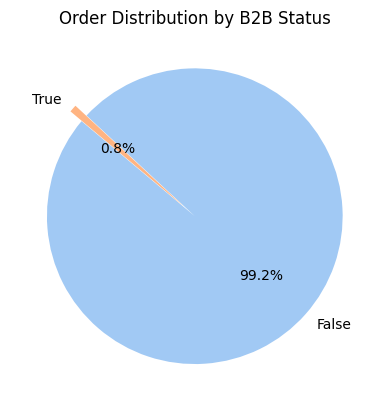

In [108]:
plt.pie(
    order_B2B.values, 
    labels=order_B2B.index, 
    autopct='%1.1f%%',  
    explode=(0.0, 0.1),  
    startangle=140, 
    colors=sns.color_palette('pastel'))
plt.title('Order Distribution by B2B Status')
plt.show()

## What DAY,MONTH and YEAR has the Highest Sales

In [110]:
order_day= df_cleaned.groupby(['Day'])['Order'].sum().reset_index()
order_day

,Day,Order
0,Friday,10455219.0
1,Monday,10953201.0
2,Saturday,11036041.0
3,Sunday,11641350.0
4,Thursday,10021432.0
5,Tuesday,11167761.0
6,Wednesday,10860437.0


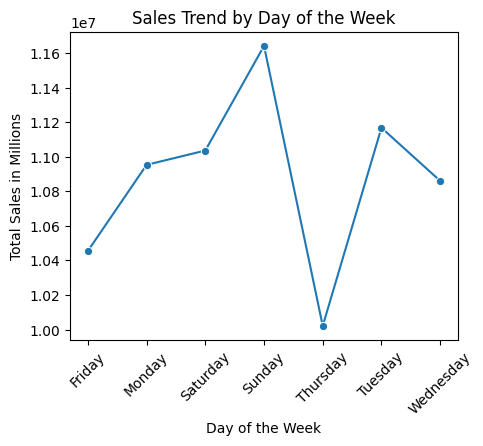

In [118]:
plt.figure(figsize=(5,4))
sns.lineplot(data=order_day, x='Day', 
             y='Order', marker='o')
plt.title('Sales Trend by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Sales in Millions')
plt.xticks(rotation=45)
plt.show()

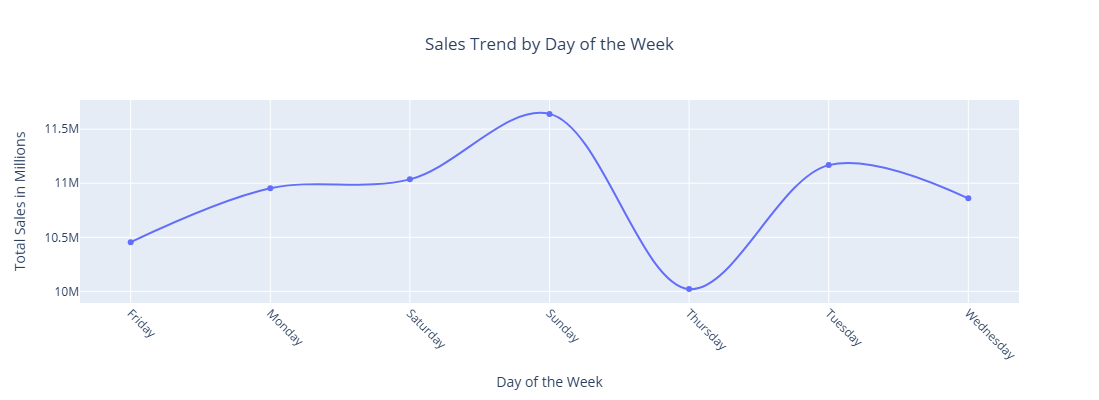

In [117]:

fig = px.line(order_day, x='Day', y='Order', 
    title='Sales Trend by Day of the Week',
    markers=True,
    labels={'Day': 'Day of the Week',
            'Order': 'Total Sales in Millions'},
    line_shape='spline')
fig.update_layout(
    width = 600,
    height = 400,
    xaxis=dict(title='Day of the Week', tickangle=45),
    yaxis=dict(title='Total Sales in Millions'),
    title=dict(x=0.5))
fig.show()

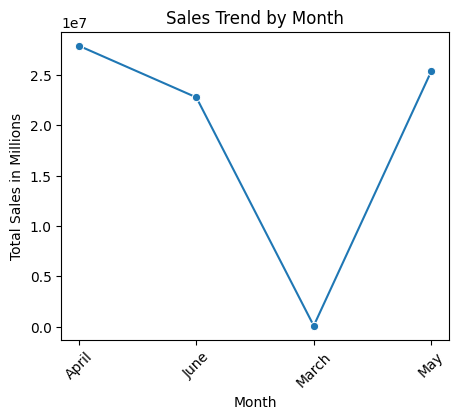

In [120]:
plt.figure(figsize=(5,4))
sns.lineplot(data=order_month, x='Mo', 
             y='Order', marker='o')
plt.title('Sales Trend by Month')
plt.xlabel('Month')
plt.ylabel('Total Sales in Millions')
plt.xticks(rotation=45)
plt.show()

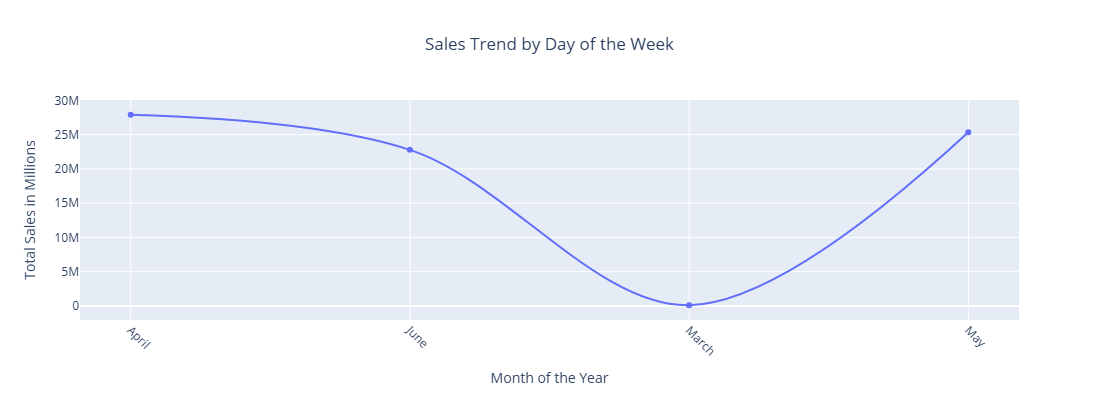

In [122]:
fig = px.line(order_month, x='Month', y='Order', 
    title='Sales Trend by Day of the Week',
    markers=True,
    labels={'Month': 'Month of the Year',
            'Order': 'Total Sales in Millions'},
    line_shape='spline')
fig.update_layout(
    width = 600,
    height = 400,
    xaxis=dict(title='Month of the Year', tickangle=45),
    yaxis=dict(title='Total Sales in Millions'),
    title=dict(x=0.5))
fig.show()

### Top  Products Size by Order

In [125]:
order_size = df_cleaned.groupby(['Size'])['Order'].sum().nlargest().reset_index()
order_size

,Size,Order
0,M,13433157.0
1,L,12783960.0
2,XL,12013945.0
3,XXL,10366106.0
4,S,10269701.0


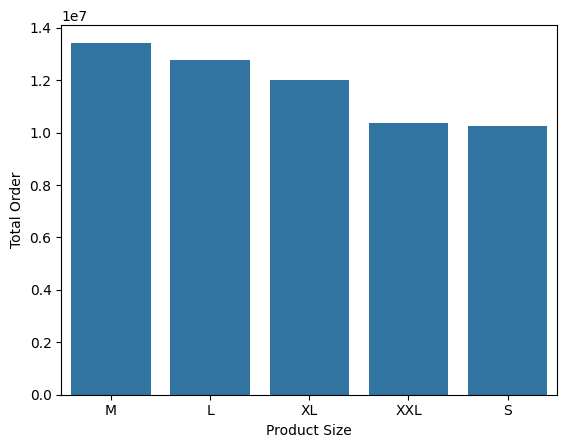

In [126]:
sns.barplot(order_size, x = 'Size', y = 'Order')
plt.xlabel('Product Size')
plt.ylabel('Total Order')
plt.show()

### Order by Merchant or Amazon

In [160]:
order_by_fulfilment= df_cleaned.groupby(['Fulfilment'])['Order'].mean().nlargest().reset_index()
order_by_fulfilment

,Fulfilment,Order
0,Amazon,611.108185
1,Merchant,542.817909


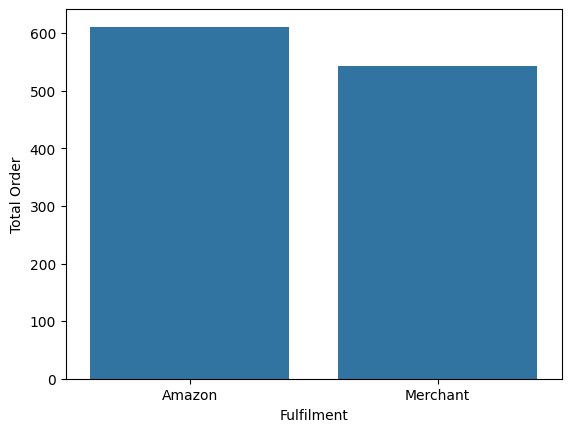

In [128]:
sns.barplot(order_by_fulfilment, x = 'Fulfilment', y = 'Order')
plt.xlabel('Fulfilment')
plt.ylabel('Total Order')
plt.show()


##  Correlation Analysis

In [131]:
# Select only numerical columns
numeric_cols = df_cleaned.select_dtypes(include=[np.number])

In [132]:
# Calculate the correlation matrix
correlation_matrix = numeric_cols.corr()
correlation_matrix 

,Qty,Amount,ship-postal-code,Year,Order
Qty,1.000000,0.071525,-0.010179,NaN,0.596731
Amount,0.071525,1.000000,-0.037210,NaN,0.760444
ship-postal-code,-0.010179,-0.037210,1.000000,NaN,-0.030496
Year,NaN,NaN,NaN,NaN,NaN
Order,0.596731,0.760444,-0.030496,NaN,1.000000


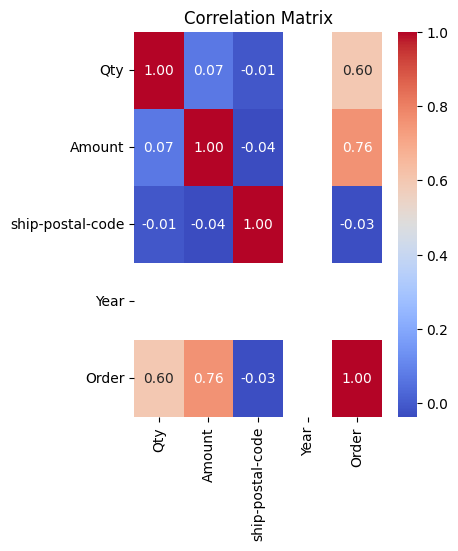

In [135]:
plt.figure(figsize=(4, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

### **Conclusion**
After analyzing the dataset, several insights and trends were uncovered:
1. **Order Status Trends**:
   - A significant proportion of orders were successfully shipped,while some were canceled. Analyzing the reasons for cancellations can help identify operational inefficiencies or customer-related issues.
   - Orders marked as "Shipped - Delivered to Buyer" highlight effective logistics and fulfillment processes, especially through merchant channels.

2. **Fulfillment and Shipping Efficiency**:
   - Orders fulfilled by Amazon (FBA) with expedited shipping generally resulted in higher delivery success rates. Merchant-fulfilled orders showed slightly higher cancellation rates.
   - Popular shipping regions included Maharashtra, Karnataka, and Tamil Nadu, emphasizing potential demand hubs.

3. **Promotion Impact**:
   - The presence of promotions (e.g., "Amazon PLCC Free Financing") influenced customer purchasing behavior, leading to higher order quantities. However, items without promotions also performed decently, suggesting a stable baseline demand.

4. **Product Insights**:
   - Sets and kurtas were the most frequently ordered items, with XL and 3XL being the dominant sizes. This indicates a market preference for specific product categories and sizes.
   - Western dresses had a slightly higher cancellation rate, possibly due to size mismatch or returns.

5. **Temporal Patterns**:
   - Most orders were placed towards the end of the week, especially on Saturdays, indicating customer shopping behavior aligns with leisure times.
   - Seasonal trends or month-wise sales could be explored further for precise demand forecasting.


### **Findings**
1. **Key Drivers of Success**:
   - Efficient shipping methods and fulfillment types (Amazon vs. Merchant) strongly influenced delivery outcomes.
   - Expedited shipping correlated with higher customer satisfaction and fewer cancellations.

2. **Cancellation Factors**:
   - Merchant fulfillment had higher cancellation rates, potentially due to delays or inconsistencies.
   - Cancellation rates were highest for specific categories like Western dresses, indicating room for improvement in size charts or product descriptions.

3. **Customer Segmentation**:
   - High-demand states like Maharashtra, Karnataka, and Tamil Nadu should be targeted for marketing efforts and faster fulfillment options.
   - Size preferences (e.g., XL, 3XL) could guide inventory stocking decisions.
"""
display(Markdown(findings))

recommendations = """
### **Recommendations**
1. **Optimize Fulfillment Processes**:
   - Encourage merchants to adopt Amazon’s fulfillment services (FBA) to improve delivery success rates.
   - Invest in streamlining the logistics for Merchant-fulfilled orders to reduce cancellations.

2. **Enhance Product Listings**:
   - Improve size charts, product descriptions, and imagery to reduce cancellations, especially for Western dresses.
   - Offer additional customer reviews or fit guidance for commonly returned items.

3. **Leverage Promotions Strategically**:
   - Analyze the impact of specific promotions on sales and cancellations to identify the most effective campaigns.
   - Offer region-specific promotions to boost sales in low-demand areas.

4. **Focus on High-Demand Regions and Categories**:
   - Allocate inventory and resources strategically to states like Maharashtra, Karnataka, and Tamil Nadu.
   - Ensure a robust supply of popular sizes like XL and 3XL for kurtas and sets.



